# An analysis of the State of the Union speeches - Part 5

In this notebook, you should explore one question or idea of your own from this dataset.  Provide the code and computations here, and summarize your points in the [main](main.ipynb) notebook.

In p5, we want to explore Obama's speech style. Specifically, we will:
1)explore the most common words he used
2)does Obama talks about himself a lot
3)whether Obama likes to use positive words

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from pandas import DataFrame
with open('data/stateoftheunion1790-2017.txt','r') as f:
    all=f.read()
    speeches=all.split('***')
speeches=speeches[1:] 
raw=pd.read_csv('data/stateoftheunion1790-2017.txt',skiprows=9,nrows=227,names=['president','title','date',''],parse_dates=[[2,3]])
raw.head()
speeches_content = DataFrame({'president':raw['president'],'title':raw['title'],'date':raw['date_'],'content': speeches})
obama_speeches_content=speeches_content[speeches_content['president'].str.contains( "Barack Obama")]
obama_speeches_content.head()

,content,date,president,title
218,\n\nAddress Before a Joint Session of Congress...,2009-02-24,Barack Obama,Address Before a Joint Session of Congress
219,\n\nState of the Union Address\nBarack Obama\n...,2010-01-27,Barack Obama,State of the Union Address
220,\n\nState of the Union Address\nBarack Obama\n...,2011-01-25,Barack Obama,State of the Union Address
221,\n\nState of the Union Address\nBarack Obama\n...,2012-01-24,Barack Obama,State of the Union Address
222,\n\nState of the Union Address\nBarack Obama\n...,2013-02-12,Barack Obama,State of the Union Address


In [4]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def tokenize_fliter_stem(texts):
    # tokenize words and send them to lower case
    tokens = [word.lower() for sent in nltk.sent_tokenize(texts) for word in nltk.word_tokenize(sent)]
    # combine stop words and punctuation
    stop = stopwords.words("english") + list(string.punctuation)
    # filter out stop words and punctuation 
    filtered_tokens =[]
    for token in tokens:
        if token not in stop:
            filtered_tokens.append(token)
    # create the stemmer
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return(stems)


In [5]:
# from collections import Counter
from collections import Counter

results = obama_speeches_content['content'].apply(tokenize_fliter_stem)  
result=results.sum()
oba_count = Counter(result)
oba_count.most_common(40)

[("'s", 681),
 ('american', 319),
 ('year', 297),
 ("n't", 274),
 ('job', 250),
 ('america', 243),
 ('work', 240),
 ('new', 217),
 ('make', 211),
 ('peopl', 204),
 ('us', 184),
 ("'ve", 167),
 ('help', 152),
 ('get', 152),
 ('need', 151),
 ('countri', 145),
 ("'re", 145),
 ('everi', 140),
 ('let', 140),
 ('time', 139),
 ('know', 137),
 ('one', 137),
 ('busi', 132),
 ('right', 129),
 ('world', 124),
 ('nation', 121),
 ('like', 119),
 ('economi', 116),
 ('famili', 110),
 ('tax', 108),
 ('tonight', 103),
 ('want', 103),
 ('congress', 100),
 ('state', 99),
 ('energi', 96),
 ('last', 94),
 ('come', 92),
 ('take', 91),
 ('also', 87),
 ('chang', 84)]

In the speeches of Obama, he talked about "american","country","congress" a lot, which is not surprised. He cares about "jobs", "works","economy","energy","tax","family" and "People". He wants to "help ,"change".

In [6]:
#tokenize speech and count how many quote mark in each speech
def tokenizer(texts):
    # tokenize speech
    words = word_tokenize(texts)
    lowerwords = [w.lower() for w in words]
    return(lowerwords)

speeches_content['tokenized speech']= speeches_content['content'].apply(tokenizer)
speeches_content.head()

,content,date,president,title,tokenized speech
0,\n\nState of the Union Address\nGeorge Washing...,1790-01-08,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi..."
1,\n\nState of the Union Address\nGeorge Washing...,1790-12-08,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi..."
2,\n\nState of the Union Address\nGeorge Washing...,1791-10-25,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi..."
3,\n\nState of the Union Address\nGeorge Washing...,1792-11-06,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi..."
4,\n\nState of the Union Address\nGeorge Washing...,1793-12-03,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi..."


In [21]:
def word_vector(doc,vocab):
    docs=[(w) for w in doc]
    counts=Counter(docs)
    return [counts[s] for s in vocab]

wanted = ['i','my','me', 'myself']
counts=[]
for row in speeches_content['tokenized speech']:
     counts.append(word_vector(row, wanted))
counts
freqency=[sum(i) for i in counts]

speeches_content['freqency']=freqency
speeches_content.head()

,content,date,president,title,tokenized speech,freqency,positive_words_freqency
0,\n\nState of the Union Address\nGeorge Washing...,1790-01-08,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",15,184
1,\n\nState of the Union Address\nGeorge Washing...,1790-12-08,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",15,144
2,\n\nState of the Union Address\nGeorge Washing...,1791-10-25,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",9,276
3,\n\nState of the Union Address\nGeorge Washing...,1792-11-06,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",30,208
4,\n\nState of the Union Address\nGeorge Washing...,1793-12-03,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",22,188


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

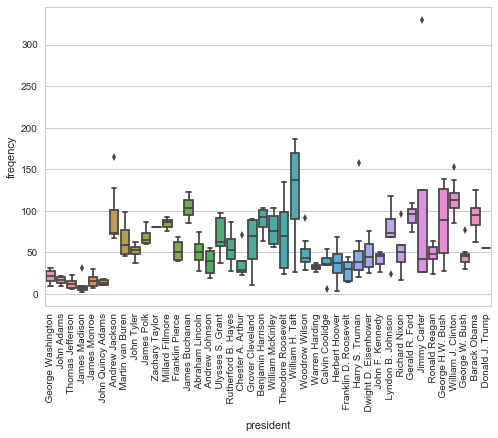

In [20]:
sns.set_style("whitegrid")
sns.boxplot(data=speeches_content, x= "president", y="freqency")
plt.xlabel("president")
plt.ylabel("freqency");
plt.xticks(rotation='vertical') 

From graph above, we can we Obama use words such "i", "me" and "my" a lot compared to other presidents, which indicates that he likes to talk about himself a lot.

In [13]:
pos_sent = open("positive.txt").read()
positive_words=pos_sent.split('\n')
positive_words[:10]

['abidance',
 'abidance',
 'abilities',
 'ability',
 'able',
 'above',
 'above-average',
 'abundant',
 'abundance',
 'acceptance']

In [17]:
counts2=[word_vector(row, positive_words) for row in speeches_content['tokenized speech']]

pos_freqency=[sum(i) for i in counts2]

speeches_content['positive_words_freqency']=pos_freqency
speeches_content.head()

,content,date,president,title,tokenized speech,freqency,positive_words_freqency
0,\n\nState of the Union Address\nGeorge Washing...,1790-01-08,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",15,184
1,\n\nState of the Union Address\nGeorge Washing...,1790-12-08,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",15,144
2,\n\nState of the Union Address\nGeorge Washing...,1791-10-25,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",9,276
3,\n\nState of the Union Address\nGeorge Washing...,1792-11-06,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",30,208
4,\n\nState of the Union Address\nGeorge Washing...,1793-12-03,George Washington,State of the Union Address,"[state, of, the, union, address, george, washi...",22,188


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

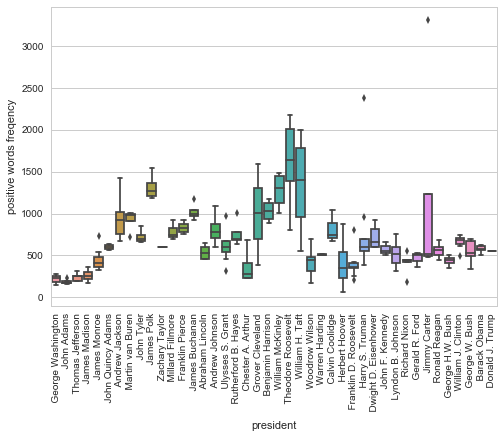

In [19]:
sns.boxplot(data=speeches_content, x= "president", y="positive_words_freqency")
plt.xlabel("president")
plt.ylabel("positive words freqency");
plt.xticks(rotation='vertical') 

Surprisingly, Obama do not use a lot of positive words compared to other presidents. Among all the presidents, Theodore and William H. Taft use positive words the most. 